## Author : Sajjad


# Task-8 Timeline Analysis_Covid-19

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

### Downloading the Data

In [3]:
!wget -O  owid-covid-data.csv https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

--2020-10-07 14:13:23--  https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10715321 (10M) [text/plain]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv 100%[===================>]  10.22M  25.3MB/s    in 0.4s    

2020-10-07 14:13:23 (25.3 MB/s) - ‘owid-covid-data.csv’ saved [10715321/10715321]



In [4]:
df = pd.read_csv("owid-covid-data.csv")

In [5]:
#Take a look at dataset

df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [6]:
#Take a look at dataset

df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48584,NaN,NaN,International,2020-09-28,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48585,NaN,NaN,International,2020-09-29,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48586,NaN,NaN,International,2020-09-30,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48587,NaN,NaN,International,2020-10-01,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48588,NaN,NaN,International,2020-10-02,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48589,NaN,NaN,International,2020-10-03,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48590,NaN,NaN,International,2020-10-04,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48591,NaN,NaN,International,2020-10-05,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48592,NaN,NaN,International,2020-10-06,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48593,NaN,NaN,International,2020-10-07,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Exploration

In [7]:
#Summarize the data

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.797900e+04,47761.000000,46979.000000,4.797900e+04,47761.000000,46979.000000,47697.000000,47697.000000,46914.000000,47697.000000,...,42747.000000,28522.000000,43319.000000,44851.000000,33900.000000,33469.000000,20319.000000,39110.000000,47700.000000,41791.000000
mean,1.113099e+05,1501.151735,1488.388960,4.329825e+03,43.892758,43.980907,2067.357168,25.962271,25.550033,60.742321,...,20850.705174,12.171454,251.712026,8.049791,10.800731,32.635599,52.387014,3.107375,74.007960,0.724383
std,1.151242e+06,13565.635870,13373.943257,4.017270e+04,368.617479,358.772199,4316.803101,78.190086,59.718127,147.147552,...,20407.419662,19.260778,117.488979,4.150025,10.477294,13.424507,31.613116,2.524601,7.377219,0.152895
min,0.000000e+00,-8261.000000,-552.000000,0.000000e+00,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,6.600000e+01,0.000000,0.571000,1.000000e+00,0.000000,0.000000,35.849000,0.000000,0.161000,0.047000,...,5338.454000,0.500000,155.898000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.606000
50%,1.131000e+03,11.000000,15.714000,2.200000e+01,0.000000,0.143000,309.573000,1.666000,3.126500,5.442000,...,14048.881000,2.000000,238.339000,7.110000,6.400000,31.400000,55.182000,2.500000,75.400000,0.754000
75%,1.239100e+04,174.000000,179.429000,2.620000e+02,3.000000,3.143000,2176.364000,19.090000,21.047000,38.846000,...,31400.840000,16.000000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,3.584825e+07,323186.000000,302387.429000,1.048181e+06,10491.000000,7456.857000,44061.214000,4944.376000,882.924000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48594 entries, 0 to 48593
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         48312 non-null  object 
 1   continent                        48030 non-null  object 
 2   location                         48594 non-null  object 
 3   date                             48594 non-null  object 
 4   total_cases                      47979 non-null  float64
 5   new_cases                        47761 non-null  float64
 6   new_cases_smoothed               46979 non-null  float64
 7   total_deaths                     47979 non-null  float64
 8   new_deaths                       47761 non-null  float64
 9   new_deaths_smoothed              46979 non-null  float64
 10  total_cases_per_million          47697 non-null  float64
 11  new_cases_per_million            47697 non-null  float64
 12  new_cases_smoothed

### Droping the Duplicates rows

In [9]:
df.shape

(48594, 41)

In [10]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 41)


In [11]:
df.count() #Used to count the number of rows

iso_code                           48312
continent                          48030
location                           48594
date                               48594
total_cases                        47979
new_cases                          47761
new_cases_smoothed                 46979
total_deaths                       47979
new_deaths                         47761
new_deaths_smoothed                46979
total_cases_per_million            47697
new_cases_per_million              47697
new_cases_smoothed_per_million     46914
total_deaths_per_million           47697
new_deaths_per_million             47697
new_deaths_smoothed_per_million    46914
new_tests                          17464
total_tests                        17885
total_tests_per_thousand           17885
new_tests_per_thousand             17464
new_tests_smoothed                 19712
new_tests_smoothed_per_thousand    19712
tests_per_case                     18151
positive_rate                      18593
tests_units     

In [12]:
#df = df.drop_duplicates()

#df.head()

In [13]:
#df.count()

### Checking the Missing or Null values

In [14]:
print(df.isnull().sum())

iso_code                             282
continent                            564
location                               0
date                                   0
total_cases                          615
new_cases                            833
new_cases_smoothed                  1615
total_deaths                         615
new_deaths                           833
new_deaths_smoothed                 1615
total_cases_per_million              897
new_cases_per_million                897
new_cases_smoothed_per_million      1680
total_deaths_per_million             897
new_deaths_per_million               897
new_deaths_smoothed_per_million     1680
new_tests                          31130
total_tests                        30709
total_tests_per_thousand           30709
new_tests_per_thousand             31130
new_tests_smoothed                 28882
new_tests_smoothed_per_thousand    28882
tests_per_case                     30443
positive_rate                      30001
tests_units     

In [15]:
#If you finds missing values in your data then remove it's by using following steps

#df = df.dropna() #Droping the missing values

#df.count()

In [16]:
#print(df.isnull().sum()) #After dropping the values

In [17]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]

df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2019-12-31,0.0,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,0.0,NaN,NaN


In [18]:
df1.date = pd.to_datetime(df.date)

df1.set_index('date', inplace = True)

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df1.head()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2019-12-31,0.0,0.0,0.0,NaN,NaN
2020-01-01,0.0,0.0,0.0,NaN,NaN
2020-01-02,0.0,0.0,0.0,NaN,NaN
2020-01-03,0.0,0.0,0.0,NaN,NaN
2020-01-04,0.0,0.0,0.0,NaN,NaN


In [20]:
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-10-03,696.0,NaN,7.0,NaN,NaN
2020-10-04,696.0,NaN,7.0,NaN,NaN
2020-10-05,696.0,NaN,7.0,NaN,NaN
2020-10-06,696.0,NaN,7.0,NaN,NaN
2020-10-07,696.0,NaN,7.0,NaN,NaN


Text(0.5, 0, 'Month')

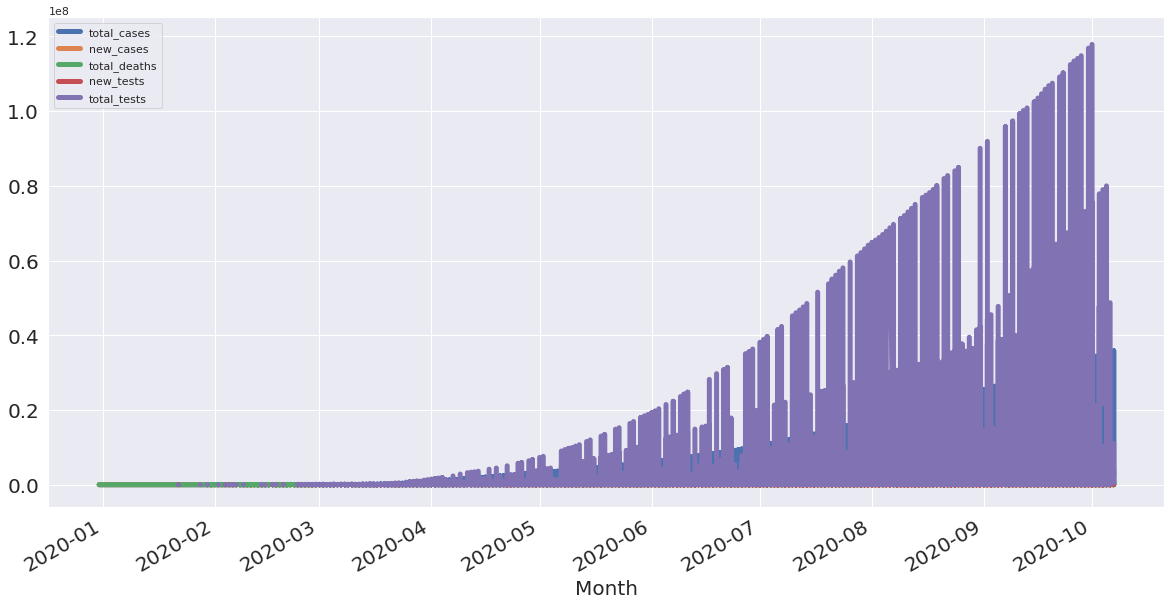

In [21]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

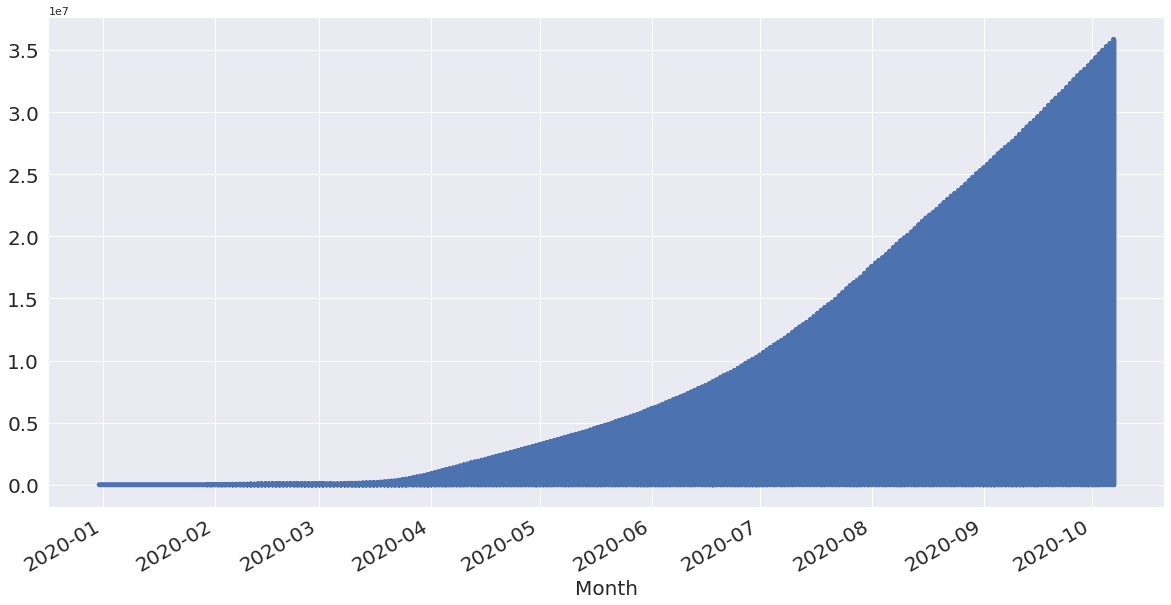

In [22]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

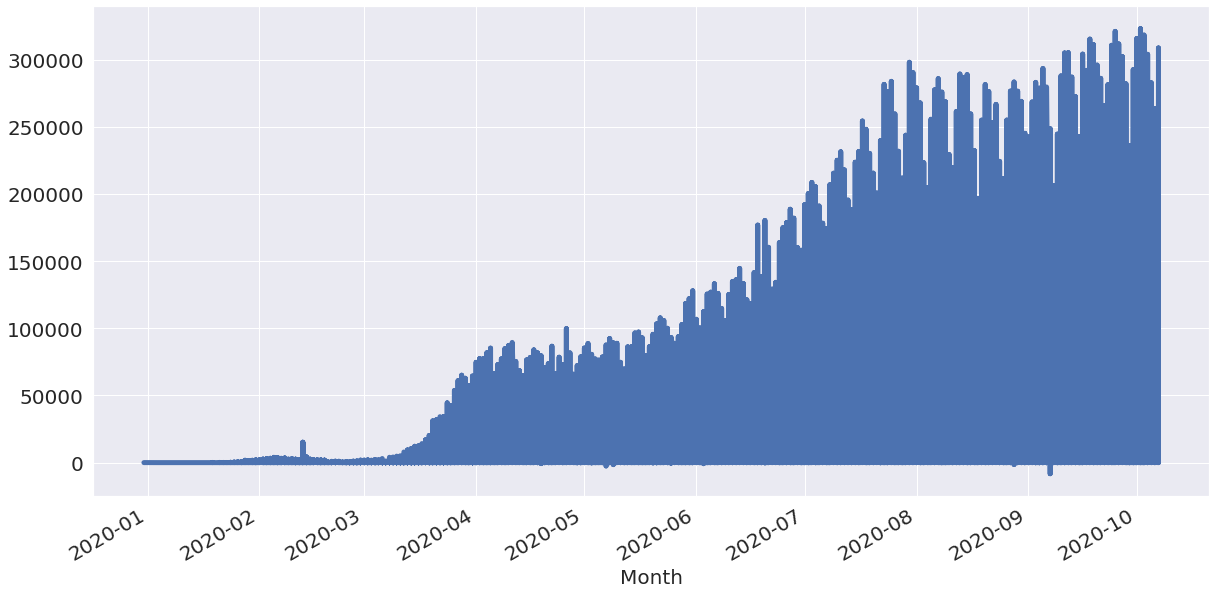

In [23]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

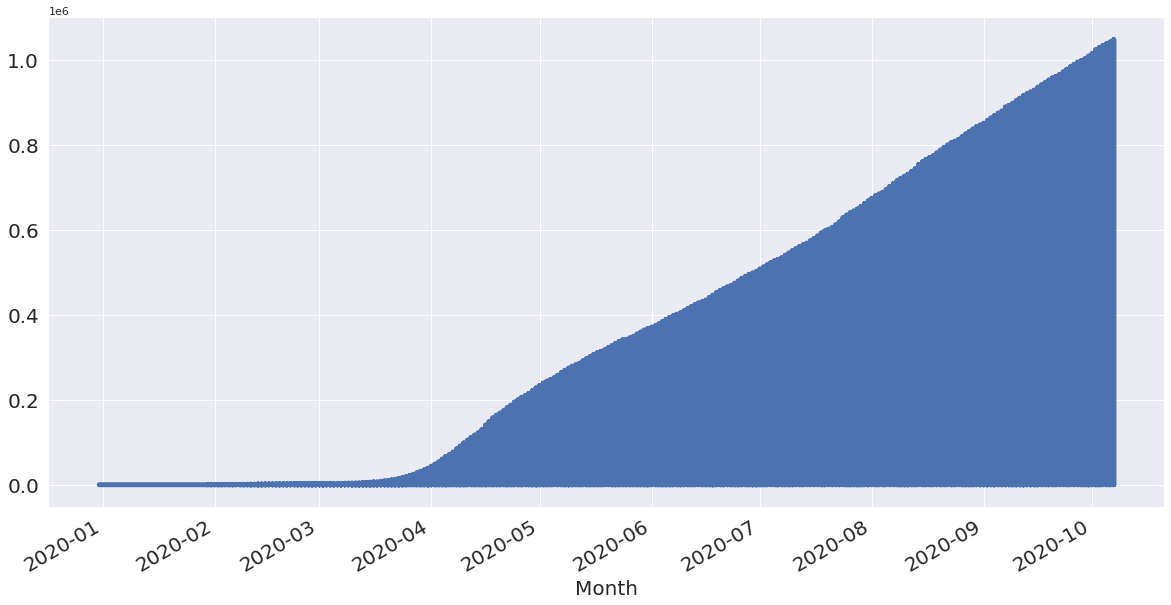

In [24]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

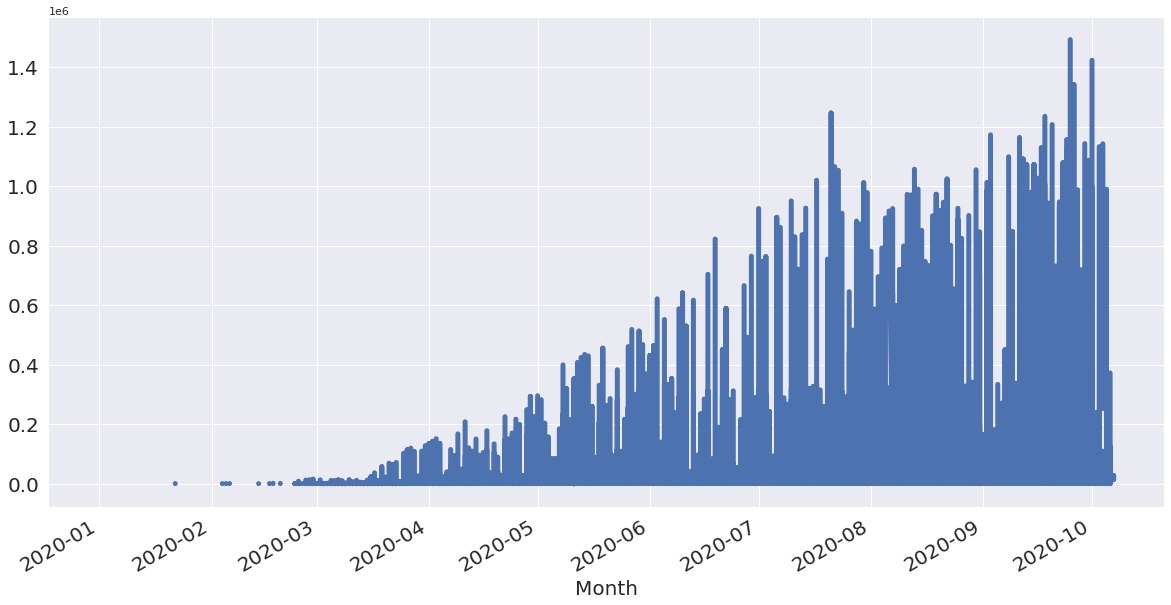

In [25]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

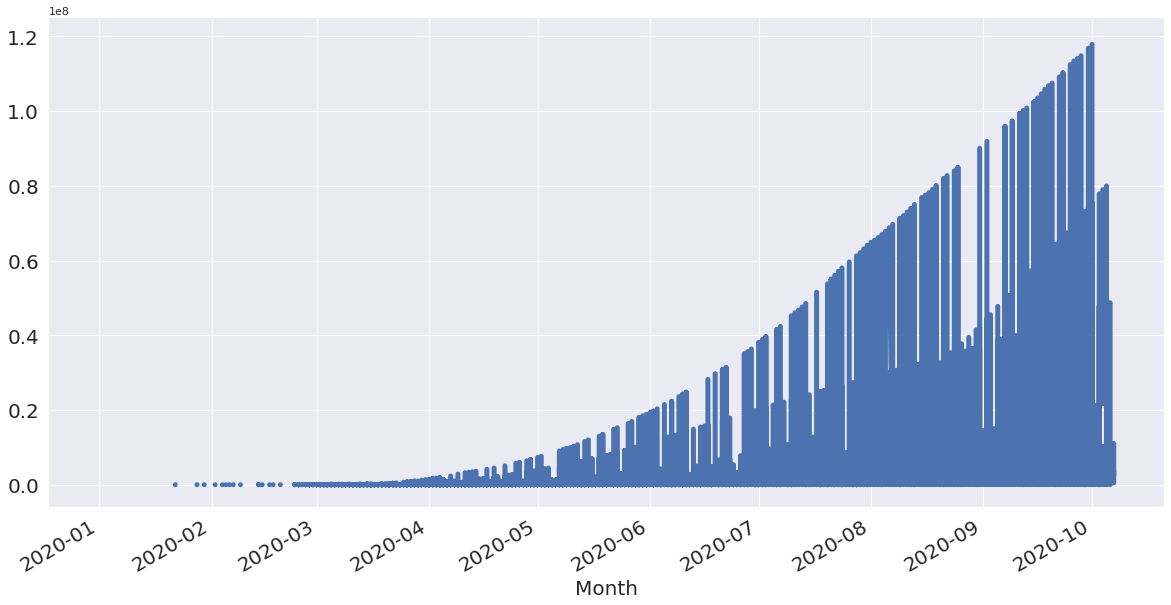

In [26]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

### Trends and Seasonality in TimeSeries Data

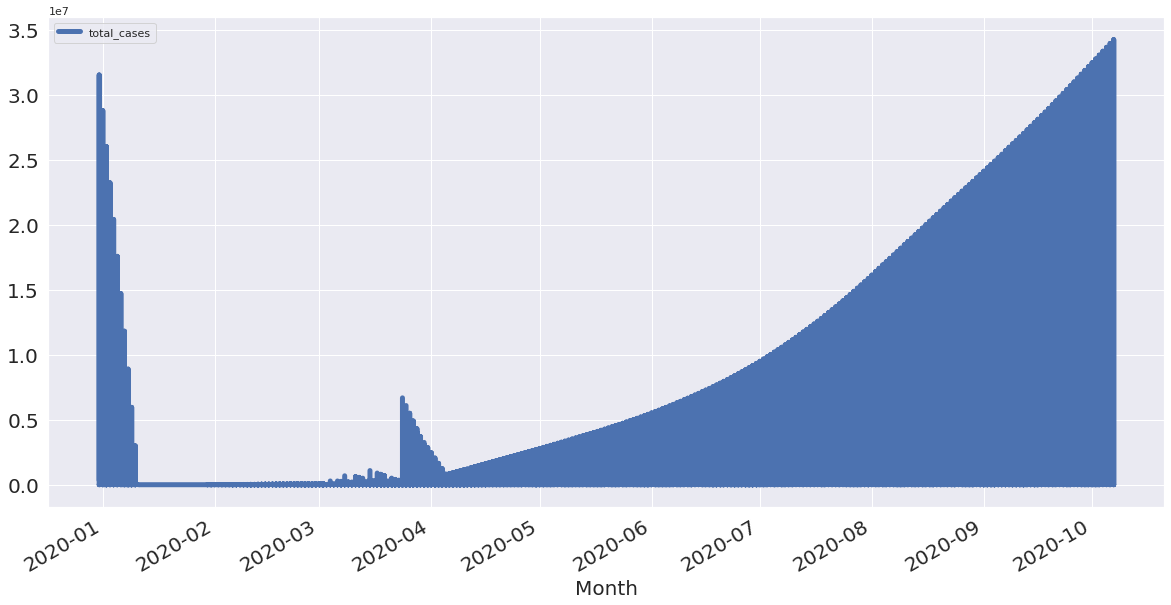

In [27]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

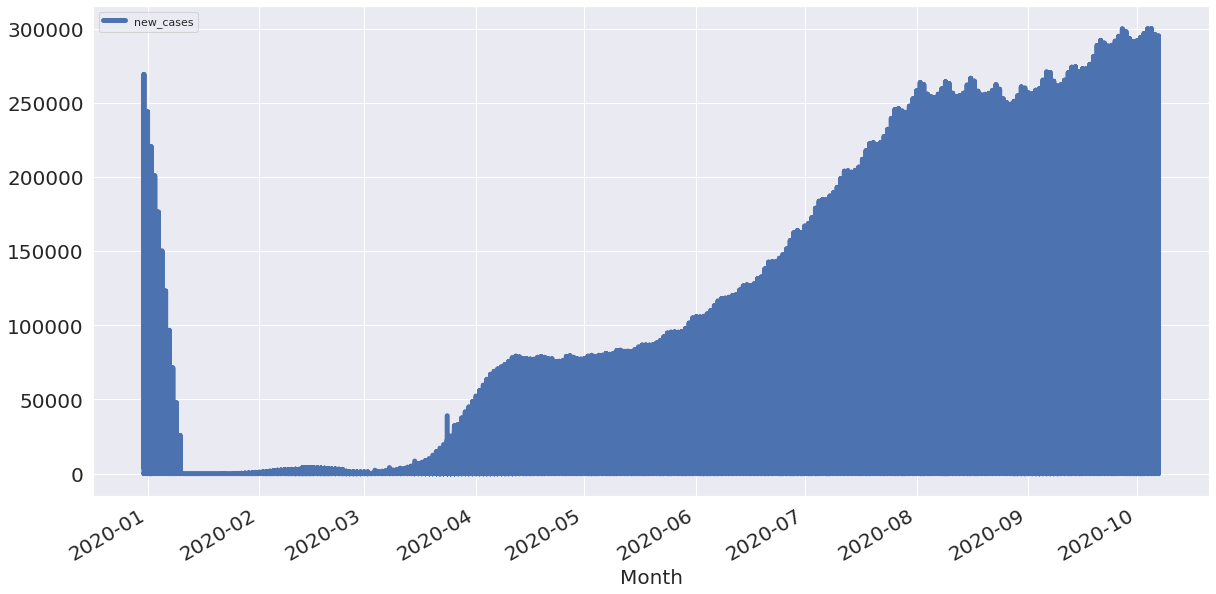

In [28]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

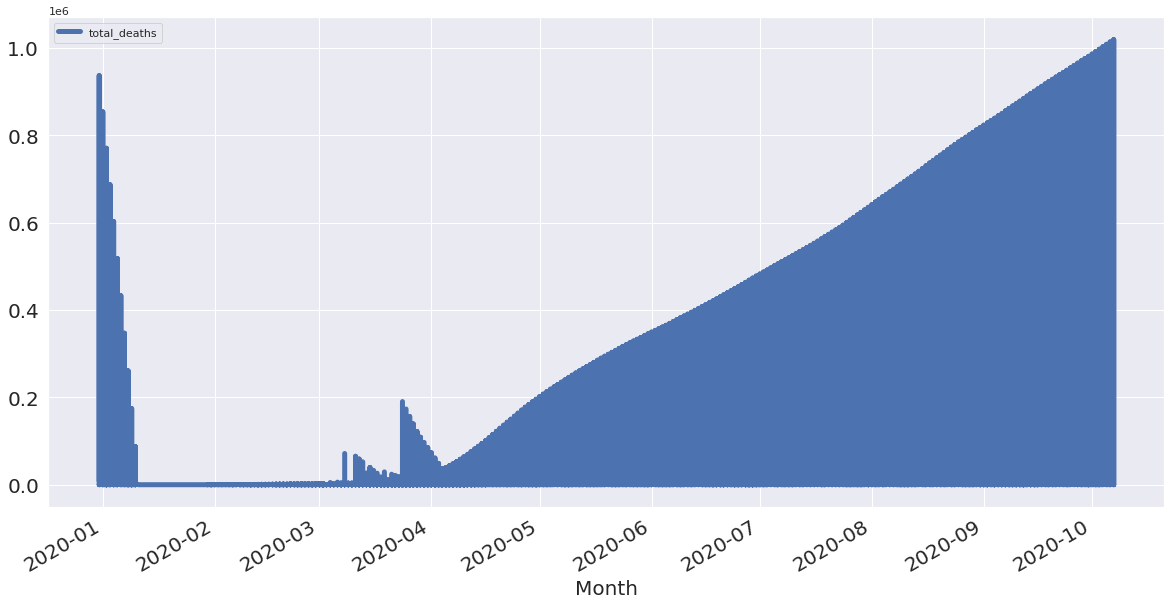

In [29]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

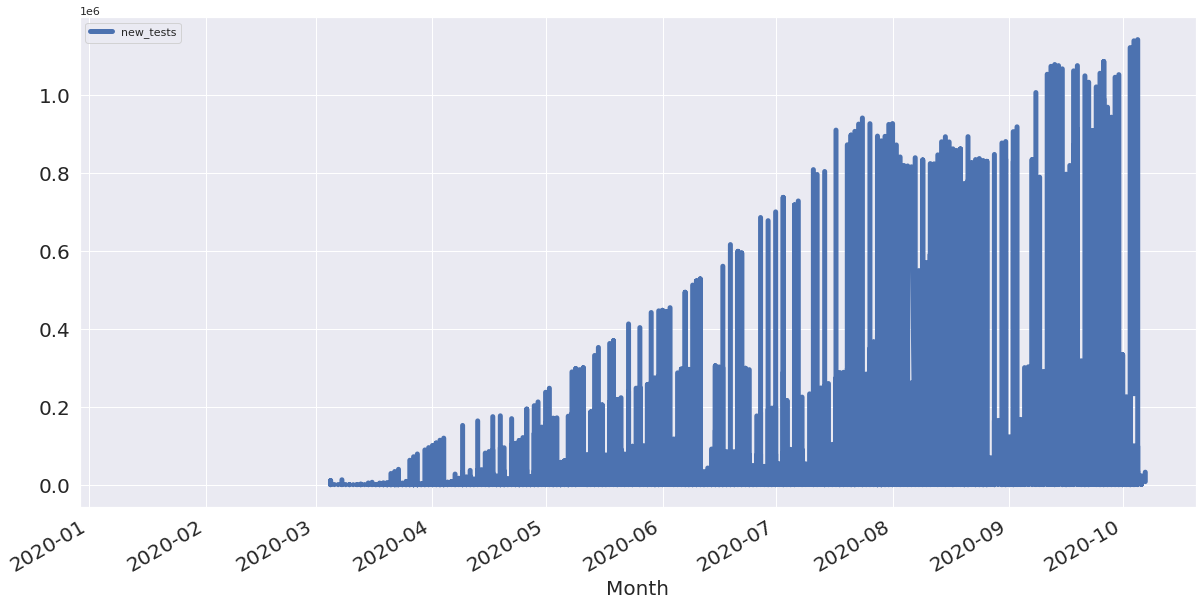

In [30]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

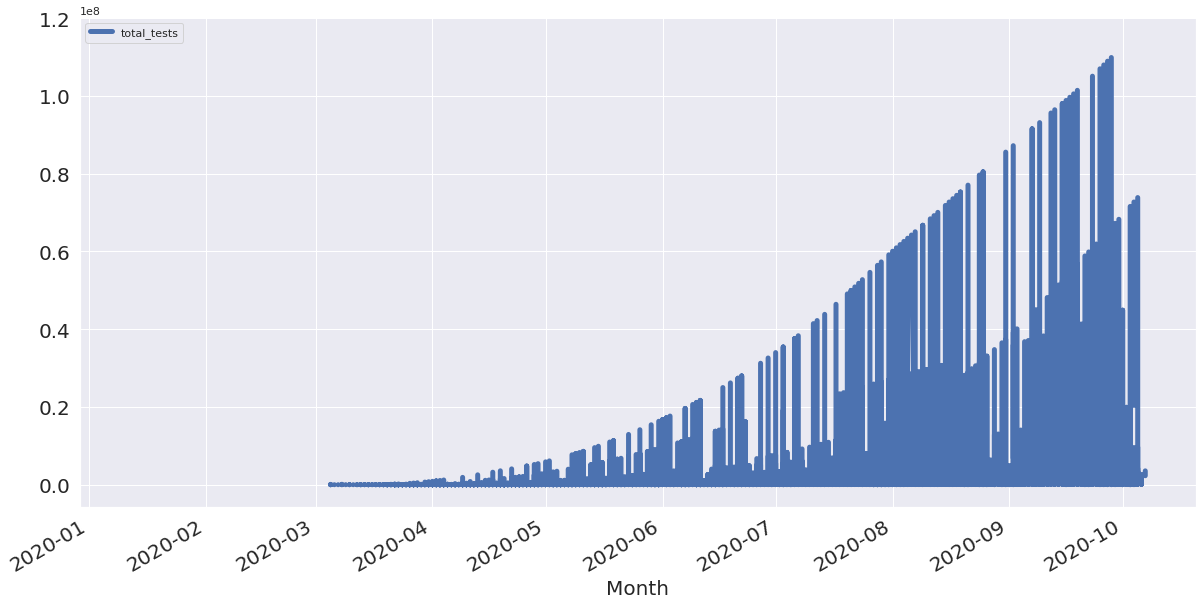

In [31]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

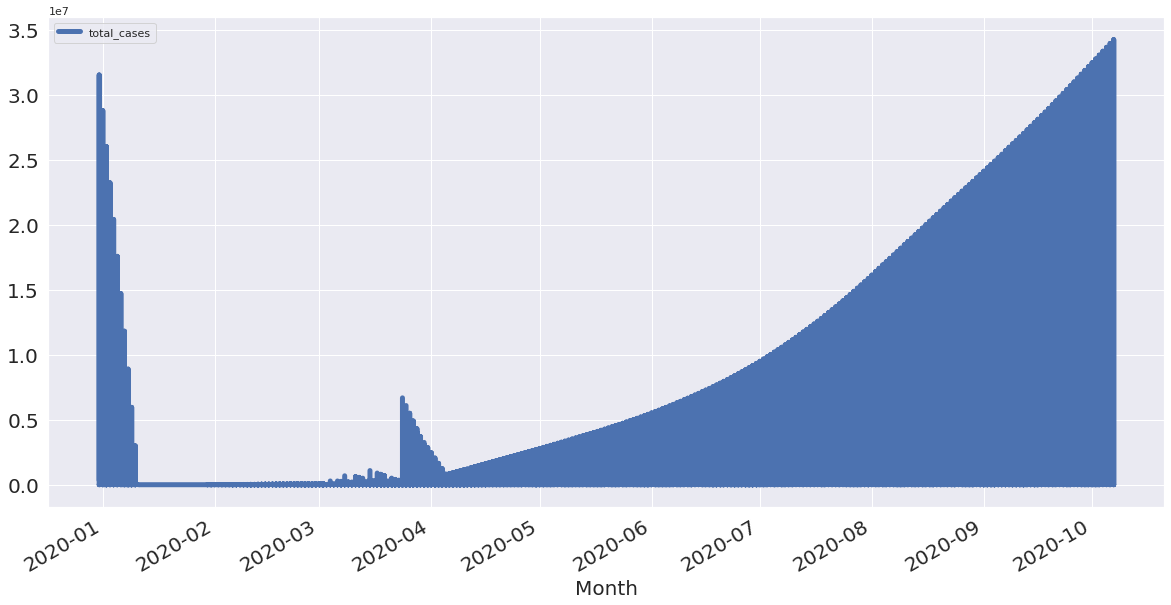

In [32]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

In [ ]:
df_rm = pd.concat([total_cases.rolling(12).mean(), total_deaths.rolling(12).mean(), axis = 1])
df_rm.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

### Seasonal Patterns in Time Series Data

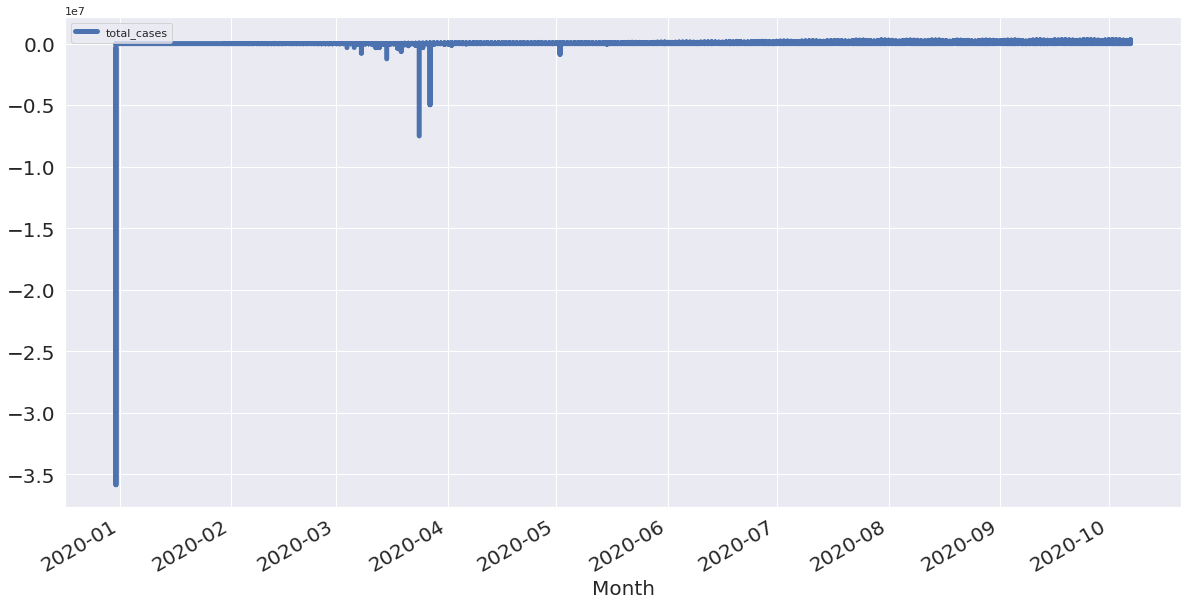

In [34]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);